<a target="_blank" href="https://colab.research.google.com/github/Techtonique/nnetsauce/blob/master/nnetsauce/demo/thierrymoudiki_20240106_DeepMTS.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## **`DeepMTS` in nnetsauce v0.16.3 for Multivariate time series (MTS)**

**Contents**

- 1 - Install
- 2 - DeepMTS

# **1 - Install**

In [84]:
!pip uninstall nnetsauce --yes

Found existing installation: nnetsauce 0.16.3
Uninstalling nnetsauce-0.16.3:
  Successfully uninstalled nnetsauce-0.16.3


In [85]:
!pwd

/Users/t/Documents/Python_Packages/nnetsauce/nnetsauce/demo


In [86]:
!python3 -m pip install ../../. --upgrade --no-cache-dir

Processing /Users/t/Documents/Python_Packages/nnetsauce
  Preparing metadata (setup.py) ... done
  Created wheel for nnetsauce: filename=nnetsauce-0.16.3-py2.py3-none-any.whl size=152410 sha256=2426fe10e516b28c3485b0971d2adfbc46e396194b2c52a19c9243a15053c476
  Stored in directory: /private/var/folders/cp/q8d6040n3m38d22z3hkk1zc40000gn/T/pip-ephem-wheel-cache-d3ur29xo/wheels/1a/03/81/1cc0cae33e498e24d4eec5887a4e621a55002440ceebce517d
Successfully built nnetsauce


In [87]:
#!pip install nnetsauce==0.16.2 --upgrade --no-cache-dir

In [88]:
!pip install statsmodels

In [89]:
import nnetsauce as ns
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV, LassoCV
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.base.datetools import dates_from_str

# **2 - `DeepMTS`**

Macro data

In [90]:
# some example data
mdata = sm.datasets.macrodata.load_pandas().data

# prepare the dates index
dates = mdata[['year', 'quarter']].astype(int).astype(str)

quarterly = dates["year"] + "Q" + dates["quarter"]

quarterly = dates_from_str(quarterly)

print(mdata.head())

#mdata = mdata[['realgdp','realcons','realinv', 'realgovt',
#               'realdpi', 'cpi', 'm1', 'tbilrate', 'unemp',
#               'pop']]

mdata = mdata[['realgovt', 'tbilrate']]

mdata.index = pd.DatetimeIndex(quarterly)

data = np.log(mdata).diff().dropna()

#data = mdata

display(data)

     year  quarter  realgdp  realcons  realinv  realgovt  realdpi   cpi  \
0 1959.00     1.00  2710.35   1707.40   286.90    470.05  1886.90 28.98   
1 1959.00     2.00  2778.80   1733.70   310.86    481.30  1919.70 29.15   
2 1959.00     3.00  2775.49   1751.80   289.23    491.26  1916.40 29.35   
3 1959.00     4.00  2785.20   1753.70   299.36    484.05  1931.30 29.37   
4 1960.00     1.00  2847.70   1770.50   331.72    462.20  1955.50 29.54   

      m1  tbilrate  unemp    pop  infl  realint  
0 139.70      2.82   5.80 177.15  0.00     0.00  
1 141.70      3.08   5.10 177.83  2.34     0.74  
2 140.50      3.82   5.30 178.66  2.74     1.09  
3 140.00      4.33   5.60 179.39  0.27     4.06  
4 139.60      3.50   5.20 180.01  2.31     1.19  


,realgovt,tbilrate
1959-06-30,0.02,0.09
1959-09-30,0.02,0.22
1959-12-31,-0.01,0.13
1960-03-31,-0.05,-0.21
1960-06-30,-0.00,-0.27
...,...,...
2008-09-30,0.03,-0.40
2008-12-31,0.02,-2.28
2009-03-31,-0.01,0.61
2009-06-30,0.03,-0.20


In [91]:
n = data.shape[0]
max_idx_train = np.floor(n*0.8)
training_index = np.arange(0, max_idx_train)
testing_index = np.arange(max_idx_train, n)
df_train = data.iloc[training_index,:]
df_test = data.iloc[testing_index,:]

In [92]:
# Adjust ElasticNetCV
regr6 = ElasticNetCV()
obj_MTS = ns.DeepMTS(regr6,
                     n_layers=3,
                     lags = 1,
                     n_hidden_features=5,
                     replications=10,
                     kernel='gaussian',
                     verbose = 1)
obj_MTS.fit(df_train)
res3 = obj_MTS.predict(h=20)
print(res3)
print("\n")


 Adjusting DeepRegressor to multivariate time series... 
 


100%|██████████| 2/2 [00:01<00:00,  1.26it/s]



 Simulate residuals using gaussian kernel... 


 Best parameters for gaussian kernel: {'bandwidth': 0.03236436676347356} 



100%|██████████| 10/10 [00:00<00:00, 3028.38it/s]


DescribeResult(mean=            realgovt  tbilrate
date                          
1999-09-30      0.01      0.00
1999-12-31     -0.02      0.06
2000-03-31      0.01      0.05
2000-06-30     -0.03      0.01
2000-09-30      0.00     -0.01
2000-12-31      0.01     -0.05
2001-03-31     -0.00     -0.02
2001-06-30     -0.01     -0.05
2001-09-30     -0.00     -0.02
2001-12-31     -0.02     -0.00
2002-03-31      0.01      0.03
2002-06-30      0.00     -0.00
2002-09-30     -0.00      0.01
2002-12-31     -0.01      0.02
2003-03-31     -0.01      0.01
2003-06-30      0.03      0.02
2003-09-30      0.00     -0.07
2003-12-31     -0.01     -0.05
2004-03-31     -0.02     -0.00
2004-06-30     -0.02     -0.06, sims=(            realgovt  tbilrate
date                          
1999-09-30      0.03     -0.00
1999-12-31     -0.01      0.05
2000-03-31     -0.03      0.03
2000-06-30     -0.03      0.07
2000-09-30      0.01     -0.13
2000-12-31      0.01     -0.42
2001-03-31     -0.01     -0.36
2001-06-30  

In [93]:
# Adjust LassoCV
regr7 = LassoCV()
obj_MTS2 = ns.DeepMTS(regr7,
                     n_layers=3,
                     lags = 4,
                     n_hidden_features=5,
                     replications=10,
                     kernel='gaussian',
                     verbose = 1)
obj_MTS2.fit(df_train)
res4 = obj_MTS2.predict(h=20)
print(res4)
print("\n")


 Adjusting DeepRegressor to multivariate time series... 
 


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:01<00:00,  1.06it/s]



 Simulate residuals using gaussian kernel... 


 Best parameters for gaussian kernel: {'bandwidth': 0.03236436676347356} 



100%|██████████| 10/10 [00:00<00:00, 5533.38it/s]


DescribeResult(mean=            realgovt  tbilrate
date                          
1999-09-30      0.01      0.00
1999-12-31     -0.02      0.06
2000-03-31      0.01      0.05
2000-06-30     -0.03      0.01
2000-09-30      0.00     -0.01
2000-12-31      0.01     -0.05
2001-03-31     -0.00     -0.02
2001-06-30     -0.01     -0.05
2001-09-30     -0.00     -0.02
2001-12-31     -0.02     -0.00
2002-03-31      0.01      0.03
2002-06-30      0.00     -0.00
2002-09-30     -0.00      0.01
2002-12-31     -0.01      0.02
2003-03-31     -0.01      0.01
2003-06-30      0.03      0.02
2003-09-30      0.00     -0.07
2003-12-31     -0.01     -0.05
2004-03-31     -0.02     -0.00
2004-06-30     -0.02     -0.06, sims=(            realgovt  tbilrate
date                          
1999-09-30      0.03     -0.00
1999-12-31     -0.01      0.05
2000-03-31     -0.03      0.03
2000-06-30     -0.03      0.07
2000-09-30      0.01     -0.13
2000-12-31      0.01     -0.42
2001-03-31     -0.01     -0.36
2001-06-30  

In [94]:
dir(obj_MTS2
)

['W_',
 'X_',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 '_validate_params',
 'a',
 'activation_func',
 'activation_name',
 'agg',
 'alpha_',
 'backend',
 'beta_',
 'bias',
 'centered_y_is_',
 'cluster_encode',
 'clustering_obj_',
 'clustering_scaler_',
 'col_sample',
 'cook_test_set',
 'cook_training_set',
 'create_layer',
 'df_',
 'direct_link',
 'drop

UnboundLocalError: cannot access local variable 'x_all' where it is not associated with a value

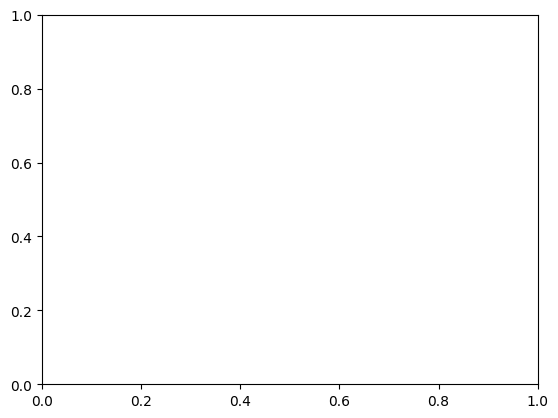

In [95]:
obj_MTS2.plot("realgovt")
obj_MTS2.plot("tbilrate")

In [ ]:
obj_MTS2.plot("realgovt", type_graph = "spaghetti")
obj_MTS2.plot("tbilrate", type_graph = "spaghetti")

TypeError: MTS.plot() got an unexpected keyword argument 'type_graph'